# Quantum Phase Estimation and Quantum States Overlap

## Objective

## Prerequisites

Before working through this notebook, you should be familiar with:

- Basic quantum computing concepts (qubits, quantum gates, measurements)
- Group theory basics (Abelian groups, cyclic groups, homomorphisms)
- Fourier analysis (discrete Fourier transform)
- Linear algebra (vector spaces, orthogonality, inner products)
- Python programming basics

## Learning Objectives

By the end of this notebook, you will be able to:

1. Understand the mathematical foundations of Quantum Fourier Transform
   over finite Abelian groups
2. Understand the relationship between QFT and phase estimation
3. Implement the Hadamard test for measuring quantum state overlaps
4. Use Classiq's quantum programming framework for QFT applications

This notebook provides a comprehensive review of Quantum Fourier Transform
(over Abelian Groups), Phase Estimation, and Hadamard test with an example
deployment of Hadamard test.

## Quantum Fourier Transform (QFT) over Abelian Groups

Following is a review of the first two sections of [The Fourier Transform and
Equations over Finite Abelian Groups](https://people.cs.uchicago.edu/~laci/HANDOUTS/fourier.pdf) by Laszlo Babai. The extremely interesting case of QFT iver non-Abelian groups would be discussed in a separate file.

Let $G$ be a finite Abelian group (preferably additive) of order $|G| = n$.

### Characters of $G$

A character of $G$ is a homomorphism from $G$ to the multiplicative group of a field (typically the multiplicative group of complex numbers $\mathbb{C}^\times$).
$$
\chi : (G, +) \to (\mathbb{C}^\times, \cdot), \quad \chi(a + b) = \chi(a)\cdot\chi(b)\;\; (a, b \in G)
$$

In the following, fundamental properties of characters are listed
1. The first thing we observe is that $\chi(0)=1$ :
<div id="cp-1">
$$
\tag{1}
\chi(a) = \chi(a + 0) = \chi(a)\cdot\chi(0) \Rightarrow \chi(0) = 1
$$
</div>

2. Immediately, it follows that $\chi(-a) = \chi(a)^{-1}$ :
<div id="cp-2">
$$
\tag{2}
\chi(0) = \chi(a - a) = \chi(a)\cdot\chi(-a) \Rightarrow \chi(-a) = \chi(a)^{-1}
$$
</div>

3. Another fundamental property of a character of an Abelian group of order $n$ is that they all are an $n$-th root of $1$ :
<div id="cp-3">
$$
\tag{3}
\chi(0) = \chi(\underbrace{a + \cdots + a}_{n\;\text{times}}) = \chi(a)^n =  1 \Rightarrow 
\chi(a) = \exp{\left(\frac{2 k \pi i}{n}\right)}
$$
</div>

4. Complex conjugate of <a href="#cp-3">(3)</a> is in fact $\chi(-a)$ :
<div id="cp-4">
$$
\tag{4}
\overline{\chi(a)} = \exp{\left(\frac{-2 k \pi i}{n}\right)} = \chi(a)^{-1} \Rightarrow 
\overline{\chi(a)} = \chi(-a)
$$
</div>

5. The character that maps every element of $G$ to $1$ is called the __principal character__ :
<div id="cp-5">
$$
\tag{5}
\chi_0(a) = 1 \quad \forall a \in G
$$
</div>

6. At this point, we could build up an interesting __orthonormality relation__ for two different non-principal characters of $G$, i.e. $S = \sum_{a \in G} \overline{\chi_{\alpha}(a)}\chi_{\beta}(a) = 0$ :
$$
\begin{align}
&\exists b \in G \quad \text{such that} \quad 
\overline{\chi_{\alpha}(b)} \ne 1 \land \chi_{\beta}(b) \ne 1 \Rightarrow\\
&\overline{\chi_{\alpha}(b)} \chi_{\beta}(b) \cdot S = 
\sum_{a\in G} \overline{\chi_{\alpha}(a+b)} \chi_{\beta}(a+b) = S \Rightarrow\\
&S(1 - \overline{\chi_{\alpha}(b)} \chi_{\beta}(b)) = 0 \Rightarrow
S = 0
\end{align}
$$
It is straightforward to see that for $\alpha = \beta$, we have $S = n$.
<div id="cp-6">
$$
\tag{6}
\frac{1}{n} \sum_{a \in G} \overline{\chi_{\alpha}(a)}\chi_{\beta}(a) = 
\left\{
\begin{align}
&1 \quad \alpha = \beta\\
&0 \quad \text{otherwise}
\end{align}
\right.
$$
</div>

8. Since $\chi$ is a non-principal character if and only if $\sum_{a \in G} \chi(a) = 0$, one could easily see that for any two non-principal characters $\chi_{\alpha}$ and $\chi_{\beta}$, their point-wise product $\chi_{\alpha}\chi_{\beta}$ is also a character :
<div id="cp-7">
$$
\tag{7}
(\chi_{\alpha}\chi_{\beta})(a) := \chi_{\alpha}(a)\chi_{\beta}(a)
$$
</div>
This means that $\widehat{G}$ as the set of all characters of $G$ is itself an Abelian group under the above operation. In fact $\widehat{G}$ is a called the $\textbf{dual group}\text{ of } G$.

#### Characters of $\mathbb{Z}_n$

In property <a href="#cp-3">(3)</a>, it is shown that all characters of an Abelian group $G$ of order $n$ are the $n$-th roots of unity. Intuitively, examining these roots, one quickly finds out that all $k$'s with the same $(k \text{ mod } n)$ basically give us exactly same roots. Furthermore, if $(k \text{ mod } n) = (k' \text{ mod } m)$ for $m < n$, then $k$ and $k'$ give the same root but at different orders.

Consequently, to find roots specific to an order, one should consider those $n$-th roots of unity that are not $l$-th roots of unity for all integers $l < n$. This happens only and only if in <a href="#cp-3">(3)</a>, $k$ and $n$ are coprimes, i.e. $\text{gcd}(k, n) = 1$. Such roots are called _primitive $n$-th roots of unity_.

Using a primitive $n$-th root of unity $\omega$, one could do a head count on characters of the cyclic group $\mathbb{Z}_n$ and define the set of characters inductively as follows :
<div id="c-zn">
$$
\tag{D-0}
\chi_j : \mathbb{Z}_n \to \mathbb{C}^{\times}, \quad \chi_j(a) := \omega^{ja} \Rightarrow \chi_{j} = \chi_1^j \Rightarrow
\widehat{\mathbb{Z}}_n = \{\chi_0, \cdots, \chi_{n-1}\} \Rightarrow
\widehat{\mathbb{Z}}_n \cong \mathbb{Z}_n
$$
</div>

This is a strong result indicating different characters of $\mathbb{Z}_n$ are unique (for a specific $\omega$) and the number of them is equal to the order of $\mathbb{Z}_n$, i,e. $\widehat{\mathbb{Z}}_n$ is isomorphic to $\mathbb{Z}_n$ but [__NOT naturally__](https://en.wikipedia.org/wiki/Natural_transformation). The reason for uniqueness is that for any arbitrary $\chi$, the element $\chi(1) = \omega^j\;\text{ for }\; 0 \le j \le n-1$ and the rest of the elements would be powers of $\chi(1)$.

#### Direct Sum of Cyclic Groups $\mathbb{Z}_n$

Based on the fundamental theorem of finitely generated Abelian groups, every finitely generated abelian group $G$ is isomorphic to a direct sum of the form :
<div id="ft-fga">
$$
\tag{D-1}
G \cong \mathbb{Z}^r \oplus \mathbb{Z}_{n_1}\oplus \mathbb{Z}_{n_2} \oplus \cdots \oplus \mathbb{Z}_{n_k}
$$
</div>
where $\mathbb{Z}^r$ is the free part of $G$, corresponding to elements of infinite order, and $\mathbb{Z}_{n_1}\oplus \mathbb{Z}_{n_2} \oplus \cdots \oplus \mathbb{Z}_{n_k}$ is the torsion part, corresponding to elements of finite order.  $r$ is a non-negative integer and $n_1, n_2, \ldots, n_k$ are positive integers such that $n_i$ divides $n_{i+1}$ for all $i$.

#### Direct Sum of Characters

It could be shown that if $G := H_1 \oplus H_2$, $\varphi_1$ and $\varphi_2$ are characters of $H_1$ and $H_2$, then $\chi(h_1, h_2) := \varphi(h_1)\cdot\varphi(h_2)$ is a character of $G$.

As a character of $G$, $\chi : H_1 \oplus H_2 \to \mathbb{C}^{\times}$, must be a homomorphism :
$$
\chi((h_1, h_2) + (h'_1, h'_2)) = \chi(h_1, h_2) \cdot \chi(h'_1, h'_2)
$$
One could see that $\chi(h_1, h_2) := \varphi(h_1)\cdot\varphi(h_2)$ is a map between $H_1 \oplus H_2$ and $\mathbb{C}^{\times}$ and is indeed a homomorphism :
$$
\chi((h_1, h_2) + (h_1', h_2')) = \chi(h_1 + h_1', h_2 + h_2') = \varphi_1(h_1 + h_1') \cdot \varphi_2(h_2 \cdot h_2') =
(\varphi_1(h_1) \cdot \varphi_1(h_1')) \cdot (\varphi_2(h_2) \cdot \varphi_2(h_2')) = \chi(h_1, h_2) \cdot \chi(h_1', h_2')
$$
This implies that the point-wise multiplication of $\varphi_1$ and $\varphi_2$, denoted by the following notation, is a character $\chi$ of $H_1 \oplus H_2$ :
<div id="dsc">
$$
\tag{8}
\chi = \varphi_1 \oplus \varphi_2
$$
</div>

Furthermore, if we could show that for all characters of $G$ are of the above form and that the map $\widehat{H}_1 \oplus \widehat{H}_2 \to \widehat{G}$ is injective, this would mean that $\widehat{G}$ is isomorphic to $\widehat{H}_1 \oplus \widehat{H}_2$.

- __injectivity__ :
$$
\chi_1 = \chi_2 \Rightarrow 
\varphi_1(h_1) \cdot \varphi_2(h_2) = \varphi_1’(h_1) \cdot \varphi_2’(h_2) \text{ for all } (h_1, h_2) \in G \Rightarrow
\varphi_1 = \varphi_1’ \text{ and } \varphi_2 = \varphi_2’
$$
- __surjectivity__ : we need to show that all characters of $G$ are identified by the map $\chi(h_1, h_2) := \varphi_1(h_1) \cdot \varphi_2(h_2)$.
$$
\text{let }\chi \in \widehat{G}, \text{ define } \varphi_i = \chi|_{H_i},\;i = 1, 2
$$
Now we need to show that $\varphi_1$ and $\varphi_2$ are characters. This is valid since a restriction of a homomorphism to a subgroup is also a homomorphism. Therefore, $\varphi_i$'s ( as restrictions of $\chi$ over $H_i$'s ) are homomorphisms over $H_i$'s.
As the final step, we need to show that if $\chi'(h_1, h_2) = \varphi_1(h_1) \cdot \varphi_2(h_2)$, then $\chi' = \chi$.
$$
\forall (h_1, h_2) \in G : \chi(h_1, h_2) = \chi((h_1, 0) + (0, h_2)) = \chi(h_1, 0) \cdot \chi(0, h_2).
$$
Reminding
$$
\chi(h_1, 0) = \chi|_{H_1} = \varphi_1(h_1) \text{ and } \chi(0, h_2) = \chi|_{H_2} = \varphi_2(h_2)
$$
we have
$$
\chi(h_1, h_2) = \varphi_1(h_1) \cdot \varphi_2(h_2) = \chi'(h_1, h_2) \Rightarrow \chi = \chi'.
$$
Therefore, the following isomorphism stands true :
<div id="dsc-iso">
$$
\tag{9}
\widehat{G} \cong \widehat{H}_1 + \widehat{H}_2.
$$
</div>

The results <a href="#dsc">(8)</a> and <a href="#dsc-iso">(9)</a> could be extended to direct sums with arbitrary lengths such as <a href="#ft-fga">(D-1)</a> which would lead to the fundamental property that the dual of the finite Abelian group $G$ is isomorphic to $G$ :
<div id="abg-iso">
$$
\tag{D-2}
\widehat{G} \cong \widehat{\mathbb{Z}}_{n_1} \oplus \cdots \oplus \widehat{\mathbb{Z}}_{n_k} \cong G
$$
</div>

### Vector Spaces for Finite Abelian Groups

Consider the following two vector spaces both over the field of complex numbers $\mathbb{C}$:
- $\mathbb{C}[G]$ : vector space of complex-valued functions $f: G \to \mathbb{C}$
- $\mathbb{C}[\widehat{G}]$ : vector space of complex-values functions $\widehat{f}: \widehat{G} \to \mathbb{C}$

#### Orthonormal Basis in $\mathbb{C}[G]$

1. A first observation is that all characters of $G$ are complex-valued functions from $G$ to $\mathbb{C}^{\times}$ and hence belong to the vector space $\mathbb{C}[G]$ as well.

2. Orthonormality relation <a href="cp-6">(6)</a> is a standard Hermitian form (inner product) :
$$
\langle f, g \rangle = \frac{1}{n} \sum_{a \in G} \overline{f(a)} g(a) \text{ where } f,g \in \mathbb{C}[G].
$$
which indicates that different characters of the complete character set $\widehat{G}$ are orthogonal.

3. Isomorphism <a href="#abg-iso">(D-2)</a> indicates $\widehat{G}$ is a complete set.

The above three points imply that $\widehat{G}$ forms an orthonormal basis in $\mathbb{C}[G]$, i.e. any function $f$ within $\mathbb{C}[G]$ could be decomposed as a linear combination of the elements of the complete set of characters of $G$.

Systematic determination of all characters of $G$ is possible through building a matrix $A$ called the __character table__ whose column $j$ is the vector $\boldsymbol{\chi}_j = (1 / \sqrt{n} )[ \chi_0(a_j) \cdots \chi_{n-1}(a_j)]^T$ where $a_j$ is the $j$-th element of $G$:
$$
A = [ \boldsymbol{\chi}_0 \; \boldsymbol{\chi}_1 \; \cdots \; \boldsymbol{\chi}_{n-1} ]
$$
Orthonormality relation <a href="cp-6">(6)</a> immediately implies that :
$$
A^{\dagger} A = I
$$
which implies that $A$ is unitary and $A A^{\dagger} = I $ which leads to another powerful orthonormality relation :
$$
\tag{10}
\frac{1}{n} \sum_{\chi \in \widehat{G}} \overline{\chi(a)}\chi(b) = 
\left\{
\begin{align}
&1 \quad a = b \\
&0 \quad \text{otherwise}
\end{align}
\right.
$$
Using orthonormality relation <a href="#cp-10">(10)</a>, one could write any function $f$ within $\mathbb{C}[G]$ as a linear combination of an element of $\widehat{G}$ at different points of $G$ :
<div id="#fte-1">
$$
\tag{D-3}
f = \sum_{\chi \in \widehat{G}} c_{\chi} \chi, \quad c_{\chi} = (\chi, f) = 
\frac{1}{n}\sum_{a \in G} \overline{\chi(a)} f(a)
$$
</div>

### QFT as a Linear Transformation

Since $\mathbb{C}[G]$ and $\mathbb{C}[\widehat{G}]$ are defined over the same field, one could define linear transformations between them. A Quantum Fourier Transform (QFT) is a linear transformation $T : \mathbb{C}[G] \to \mathbb{C}[\widehat{G}]$ defined as follows :
<div id="#fte-2">
$$
\tag{D-4}
T(f) = \widehat{f}(\chi) = \sum_{a \in G} \chi(a) f(a) = nc_{\overline{\chi}}, \quad \chi \in \widehat{G}
$$
</div>

The inverse transform, using <a href="#fte-1">(D-3)</a>, <a href="#fte-2">(D-4)</a>, and <a href="#cp-4">(4)</a>, would be :
$$
T^{-1}(\widehat{f}) = f(a) = \sum_{\chi \in \widehat{G}} c_{\chi} \chi(a) = 
\sum_{\chi \in \widehat{G}} \frac{1}{n} \widehat{f}(\overline{\chi}) \chi(a) =
\frac{1}{n} \sum_{\chi \in \widehat{G}} \widehat{f}(\chi) \chi(-a), \quad a \in G
$$

#### QFT in terms of basis vectors

One could find the equivalence of the above transformations using the indicator function (Dirac delta function) $\delta_x(a) \in \mathbb{C}[G]$ :
$$
\delta_x(a) =
\delta(x - a) =
\left\{
\begin{align}
&1 \quad x = a \\
&0 \quad otherwise
\end{align}
\right.
, \quad x \in G
$$
Now lets see what would $\delta_x$ be Fourier transformed into :
$$
T(\delta_x) = \widehat{\delta}_x = \sum_{a \in G} \chi(a) \delta_x(a) = \chi(x)
$$
This implies:
$$
\widehat{f} = \sum_{a \in G} \widehat{\delta}_a f(a)
$$
If we denote the basis of $\mathbf{C}[G]$ by $|x\rangle$, then $f(x)$ could be evaluated using the inner product :
$$
f(x) = \langle x | f \rangle
$$
or equivalently, by :
$$
f(x) = \sum_{a \in G} f(a) \delta_a(x) = n \cdot \langle \delta_x , f\rangle
$$
This implies that :
$$
\tag{11}
\left.
\begin{align}
f(x) &= \sum_{a \in G} f(a) \delta_a(x) \\
&\text{ or } \\
f &= \sum_{a \in G} f(a) |a\rangle 
\end{align}
\right\}
\Rightarrow 
|a\rangle \leftrightarrow \delta_a
$$
The above equivalence would lead us to a formulation of QFT in terms of basis vectors of $\mathbb{C}[G]$ and $\mathbb{C}[\widehat{G}]$ :
$$
\tag{D-5}
F_G := \frac{1}{\sqrt{n}} \sum_{x \in G} \sum_{\chi \in \widehat{G}} \chi(x) | \chi \rangle \langle x |
$$

#### QFT for $\mathbb{Z}_{n}$

In <a href="#c-zn">(D-0)</a>, characters of $\mathbb{Z}_n$ were formulated in terms of a primitive $n$-th root of unity $\omega$. This would lead to the following matrix representation for $F_{\mathbb{Z}_n}$ :
<div id="qft-zn">
$$
\tag{12}
F_{\mathbb{Z}_n} = \frac{1}{\sqrt{n}} \begin{pmatrix}
1 &\; 1 &\; 1 &\; \cdots &\; 1 \\
1 &\; \omega &\; \omega^2 &\; \cdots &\; \omega^{n-1} \\
1 &\; \omega^2 &\; \omega^4 &\; \cdots &\; \omega^{2(n-1)} \\
\vdots &\; \vdots &\; \vdots &\; \ddots &\; \vdots \\
1 &\; \omega^{n-1} &\; \omega^{2(n-1)} &\; \cdots &\; \omega^{(n-1)(n-1)}
\end{pmatrix}
$$
</div>

$\omega$ could be any primitive $n$-th root of unity but a conventional choice to be used for any $n$ would be $\omega = \exp{(2\pi i / n)}$.

#### Unitary QFT

Based on <a href="#qft-zn">(12)</a>, the unitary QFT ($\mathbb{Z}_{N = 2^m}$) is represented by :

$$
U_{QFT} |x\rangle = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi i \frac{xk}{N}} |k\rangle
$$

For 4 qubits ($N=16$) and the state $|0\rangle$:

$$
U_{QFT} |0\rangle = \frac{1}{\sqrt{16}} \sum_{k=0}^{15} e^{2\pi i \frac{0 \cdot k}{16}} |k\rangle = \frac{1}{4} \sum_{k=0}^{15} |k\rangle
$$

which leads to the expectation value:
<div id="example">
$$
\tag{E-1}
\langle 0 | U_{QFT} | 0 \rangle = \langle 0 | \left( \frac{1}{\sqrt{16}} \sum_{k=0}^{15} |k\rangle \right) = \frac{1}{\sqrt{16}} \langle 0 | 0 \rangle = 0.25
$$
</div>

This means that we expect our execution converges to the value 0.25 for $2 P(0) - 1$.

## Quantum Phase Estimation (QPE)

In QPE, the objective is to estimate the phase, in the eigenvalue equation
$$
\hat{U}|\psi\rangle = e^{2\pi i \varphi}|\psi\rangle.
$$
The idea is to use $H^{\otimes n}$ followed by a series of $n$ controlled-Unitary operations followed by an $n$-qubit QFT to encode the phase in $n$ ancilla qubits as $|2^n \varphi\rangle$.
$$
\frac{1}{\sqrt{2^n}} \sum_{x \in \mathbb{Z}_{2^n}} |x\rangle \otimes |\psi\rangle 
\xrightarrow{\sum_{x \in \mathbb{Z}_{2^n}} | x \rangle\langle x | \otimes U^x}
\frac{1}{\sqrt{2^n}} \sum_{x \in \mathbb{Z}_{2^n}} e^{2 \pi i x \varphi} |x\rangle \otimes |\psi\rangle
\xrightarrow{\text{QFT}^{-1}}
|2^n \varphi\rangle \otimes |\psi\rangle
$$


The circuitry could be depicted as follows :

- Prepare the initial state; the first register $|0\rangle^{\otimes n}$ composed of $n$-qubits which would record $2^n \varphi$ and the second register stores the eigenstate $|\psi\rangle$ :
$$
|0\rangle^{\otimes n} \otimes |\psi\rangle
$$
- Apply Hadamard to each on the $n$ qubits :
$$
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} |k\rangle \otimes |\psi\rangle
$$
- Apply a series of $n$ controlled-$U^k\;\;(0 \le k \le n-1)$ operators with $|k\rangle$ being the control-qubit and $|\psi\rangle$ being the target state :
$$
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} |k\rangle \otimes U^k |\psi\rangle =
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} e^{2\pi i k \varphi} |k\rangle \otimes |\psi\rangle
$$
- Apply inverse QFT on the first register (ancilla):

$$
\begin{align}
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} e^{2\pi i k \varphi} |k\rangle \otimes |\psi\rangle \rightarrow | \tilde{\varphi} \rangle \otimes |\psi\rangle &= 
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} e^{2\pi i k \varphi} \text{QFT}^{-1}|k\rangle \otimes |\psi\rangle \\
&= \frac{1}{2^n} 
\sum_{k=0}^{2^n-1} e^{2\pi i k \varphi} 
\left( 
\sum_{x=0}^{2^n-1} e^{-2\pi i x k / 2^n} |x\rangle 
\right) \otimes |\psi\rangle \\
&= \frac{1}{2^n} 
\sum_{x=0}^{2^n-1}
\left(
\sum_{k=0}^{2^n-1} e^{2\pi i k (\varphi - x / 2^n)}
\right) |x\rangle \otimes |\psi\rangle \\
&= \frac{1}{2^n} 
\sum_{x=0}^{2^n-1}
2^n \delta_{x, 2^n \varphi}
|x\rangle \otimes |\psi\rangle \\
&= |2^n \varphi\rangle \otimes |\psi\rangle
\end{align}
$$


## Hadamard Test

Hadamard test is used to estimate the real or imaginary part of the inner product $\langle \psi | U | \psi \rangle$ for a quantum state $|\psi\rangle$ and a unitary operator $U$.

Similar to QPE, the main idea here is to entangle two registers using controlled-$U$ operators and through this and the magic of a second Hadamard operator, state $|0\rangle$'s probability would reflect the relevant expectation value of $U$.

- Prepare an initial state with two registers; first register is the ancilla whose measurement would determine the result and the second register stores $|\psi\rangle$ :
$$
|0\rangle \otimes |\psi\rangle
$$
- Apply Hadamard on the ancilla :
$$
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |\psi\rangle
$$
- Apply the controlled-$U$ with ancilla as the control and target being $|\psi\rangle$ :
$$
\frac{1}{\sqrt{2}}(|0\rangle \otimes |\psi\rangle + |1\rangle \otimes U|\psi\rangle)
$$
- Apply the second Hadamard on the ancilla for the magic to happen :
$$
H \left( \frac{1}{\sqrt{2}}(|0\rangle \otimes |\psi\rangle + |1\rangle \otimes U|\psi\rangle) \right) =
\frac{1}{2} \left( |0\rangle \otimes (|\psi\rangle + U|\psi\rangle) + |1\rangle \otimes (|\psi\rangle - U|\psi\rangle) \right)
$$
- Perform measurements on the ancilla :

$$
\begin{align}
&P(0) = \frac{1}{4} (2 + \langle \psi | U | \psi \rangle + \langle \psi | U^\dagger | \psi \rangle) = 
\frac{1}{2} \left( 1 + \text{Re} \langle \psi | U | \psi \rangle \right) \\
&P(1) = \frac{1}{4} (2 - \langle \psi | U | \psi \rangle - \langle \psi | U^\dagger | \psi \rangle) = \frac{1}{2} \left( 1 - \text{Re} \langle \psi | U | \psi \rangle \right)
\end{align}
$$

## Example (Hadamard Test)

The objective is to use the Hadamard test and calculate the (real part of the) expectation value of the QFT oracle : $\text{re} \{ \langle 0 | U_{QFT} | 0 \rangle \} = 2 P_0 - 1$. 

\[ Check out <a href="#example">(E-1)</a> for the expected result. \]

### Circuitry in Classiq

In [ ]:
# Setup: Classiq Authentication (Optional)
# Execute this cell only if you are not already authenticated
# and do not have a valid API token configured
# 
# If you need to connect through a proxy, uncomment and set:
# import os
# os.environ['http_proxy'] = "PROXY_ADDRESS" 
# os.environ['https_proxy'] = "PROXY_ADDRESS"
#
# import classiq
# classiq.authenticate()

In [1]:
# Setup: Imports and Environment Configuration
# This notebook assumes you have set up the base environment
# as described in the main README.md

# Core scientific computing
import numpy as np

# Quantum computing framework imports
from classiq import *
from classiq.execution import ExecutionPreferences

#NUM_QUBITS = 4
#s = np.zeros(2**NUM_QUBITS)
#s[0] = 1

@qfunc
def main(expectation_value: Output[QBit]):
    
    allocate(1, expectation_value)
    psi = QArray("psi")
    #prepare_litudes(s.tolist(), 0.0, psi)
    allocate(4, psi)
    
    # Apply Hadamard gate to the first qubit
    H(expectation_value)
    
    # Apply Quantum Fourier Transform to the last 4 qubits within a controlled block
    control(ctrl = expectation_value, operand=lambda: qft(psi))
    
    # Apply Hadamard gate to the first qubit again
    H(expectation_value)

# Create the model and synthesize the quantum program
model = create_model(main)

# create programs with 1000, 2000, 4000, 8000, and 16000 shots
num_shots = []
quantum_model_with_execution_preferences = []
quantum_program_with_execution_preferences = []
result = []
expvalue = []
for i in range(5):
    num_shots.append((2 ** i) * 1000)
    quantum_model_with_execution_preferences.append(
        set_execution_preferences(
            model,       
            ExecutionPreferences(
                num_shots=num_shots[i], 
                job_name=f"quantum primitives 1 - {num_shots} shots", 
                random_seed=767
            ),
        )
    )
    
    quantum_program_with_execution_preferences.append( 
        synthesize(
            quantum_model_with_execution_preferences[i]
        )
    )
    
    # Uncomment to show quantum programs in Classiq platform
    #show(quantum_program_with_execution_preferences[i])
    
    # Execute the programs on the simulator
    result.append(
        execute(quantum_program_with_execution_preferences[i]).result()
    )
    expvalue.append(2 * result[i][0].value.counts['0'] / num_shots[i] - 1)
    
    # Dump expectation value results
    print(f"number of shots : {num_shots[i]}" + 
          " " * (6 - len(str(num_shots[i]))) + 
          f" | expectation value : {expvalue[i]}")

number of shots : 1000   | expectation value : 0.20399999999999996
number of shots : 2000   | expectation value : 0.21999999999999997
number of shots : 4000   | expectation value : 0.22550000000000003
number of shots : 8000   | expectation value : 0.2397499999999999
number of shots : 16000  | expectation value : 0.24449999999999994


In [2]:
# Save the quantum model to a .qmod file
# This generates qft-expvalue.qmod in the current working directory
write_qmod(create_model(main), "qft-expvalue")

### Analysis

Let's first take a look at the results of the program execution with respect to the number of shots.

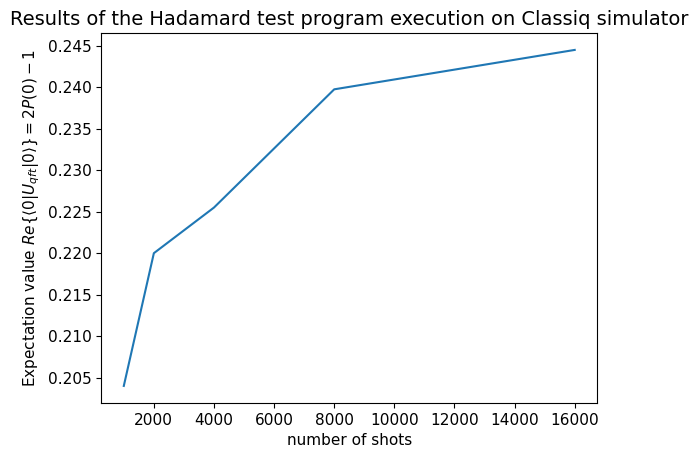

In [3]:
# Visualization
import matplotlib.pyplot as plt

plt.plot(num_shots, expvalue)
plt.ylabel("Expectation value $Re \\{ \\leftangle 0 | U_{qft} | 0 \\rightangle \\} = 2 P(0) - 1$", fontsize=11)
plt.xlabel("number of shots", fontsize=11)
plt.tick_params(axis="both", labelsize=11)
plt.title("Results of the Hadamard test program execution on Classiq simulator", fontsize=14)
plt.show()

## File Paths and Working Directory

This notebook assumes you are running from the `quantum_fourier_transform_abelian/`
directory. It will generate:

- `qft-expvalue.qmod` - Quantum model file (if `write_qmod` is executed in
  the notebook)

This file is saved in the current working directory.

The expectation value of $U_{qft}$ for 1,000 shots is almost 20% lower than the corresponding value obtained using 16,000 shots; however, the slope of the diagram has significantly decreased when we have moved from 8,000 number of shots to 16,000 (less than 2% difference). This indicates that the relative error has meaningfully decreased and a 4-digit number of shots would be a good choice for our simulation. 

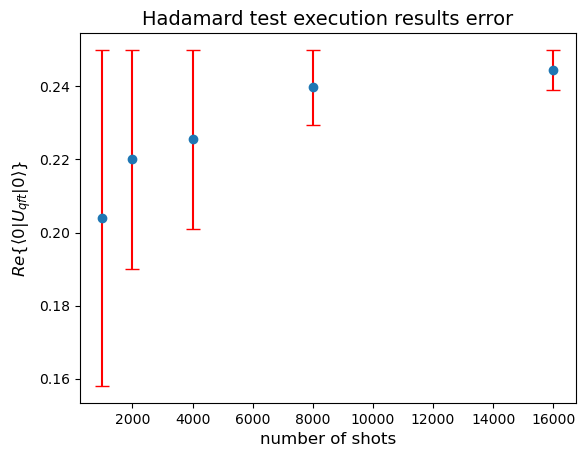

In [4]:
expvalueerror = []

for i in range(len(expvalue)):
    expvalueerror.append(0.25 - expvalue[i])

plt.errorbar(
    num_shots, 
    expvalue, 
    yerr = expvalueerror, 
    fmt='o', 
    ecolor='r', 
    capsize=5, 
    label='Hadamard test execution results error'
)

# Add labels and title
plt.xlabel('number of shots', fontsize=12)
plt.ylabel('$Re \\{ \\leftangle 0 | U_{qft} | 0 \\rightangle \\}$', fontsize=12)
plt.title('Hadamard test execution results error', fontsize=14)

plt.show()

## Summary

This notebook provided a comprehensive review of Quantum Fourier Transform
over finite Abelian groups and its applications. Key takeaways include:

- QFT is a linear transformation between $\\mathbb{C}[G]$ and
  $\\mathbb{C}[\\widehat{G}]$, where $G$ is a finite Abelian group and
  $\\widehat{G}$ is its dual group of characters
- Characters of Abelian groups have orthogonality properties that make
  them ideal for quantum algorithms
- Phase estimation and Hadamard test are important applications of QFT
- The Hadamard test allows measurement of quantum state overlaps using
  controlled operations

## Further Reading

- [The Fourier Transform and Equations over Finite Abelian
  Groups](https://people.cs.uchicago.edu/~laci/HANDOUTS/fourier.pdf) by
  Laszlo Babai
- Related notebooks: [Quantum Walk - path
  graph](../quantum_walk/)